The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [Internet Archive Wayback Machine](https://web.archive.org/web/20180630204548/http://seaborn.pydata.org/).  

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read dataset
df = pd.read_csv('files/Pokemon.csv', index_col=0)

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

Text(0.5, 1, 'Attack vs defense stats for gen 1 pokemon')

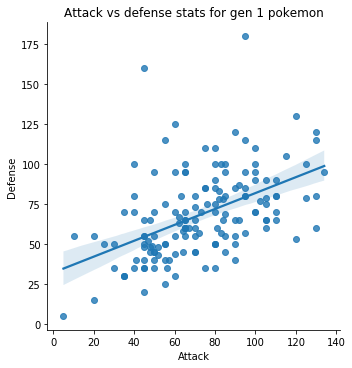

In [4]:
sns.lmplot(x = 'Attack', y = 'Defense', data = df)
plt.title('Attack vs defense stats for gen 1 pokemon')

Text(0.5, 1, 'Attack vs defense stats for gen 1 pokemon by stage')

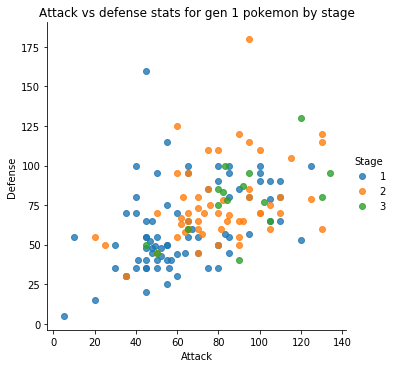

In [5]:
sns.lmplot(x = 'Attack', y = 'Defense', data = df, fit_reg = False, hue = 'Stage')
plt.title('Attack vs defense stats for gen 1 pokemon by stage')

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://web.archive.org/web/20180621043054/https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles) on that for the version in Anaconda.

Text(0.5, 1.0, 'Distribution of Speed for Pokemon')

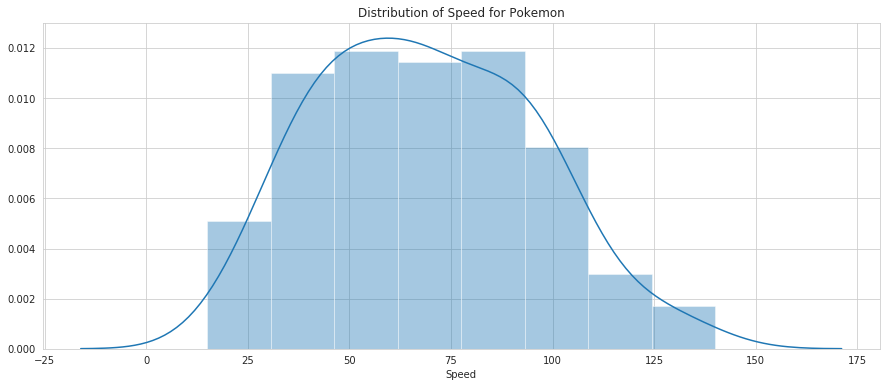

In [6]:
plt.figure(figsize=(15, 6))
with sns.axes_style('whitegrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")

Text(0.5, 1.0, 'Boxplot of different stats')

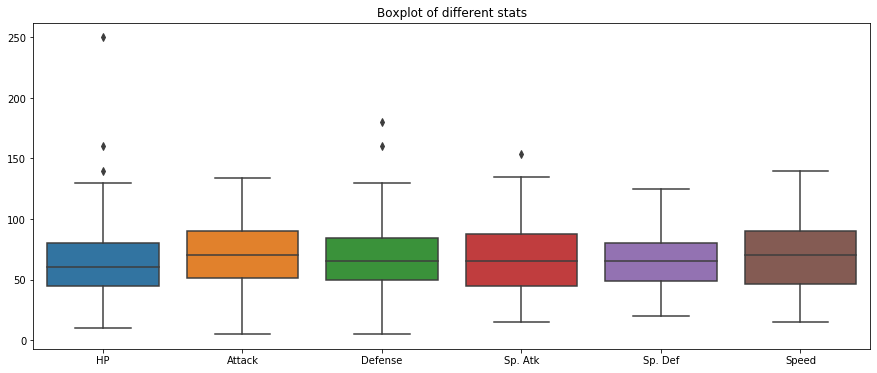

In [7]:
plt.figure(figsize=(15, 6))
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df)
plt.title("Boxplot of different stats")

Text(0.5, 1.0, 'violin plot of pokemons primary type and their attack')

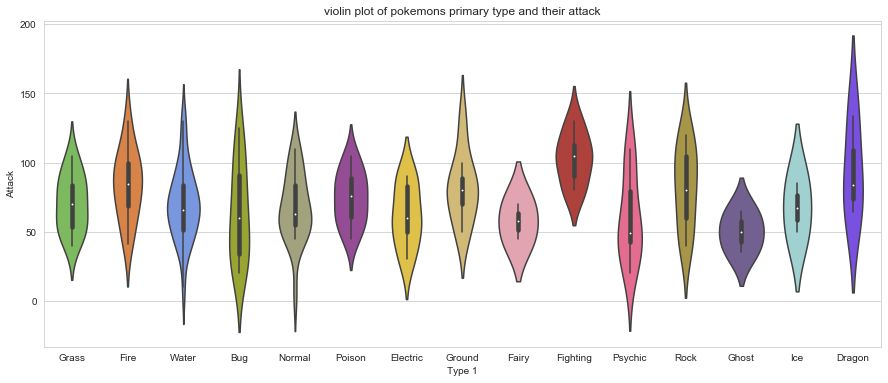

In [8]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
plt.figure(figsize=(15, 6))
sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)
plt.title("violin plot of pokemons primary type and their attack")

Text(0.5, 1.0, 'violin plot of pokemons primary type and their special attack')

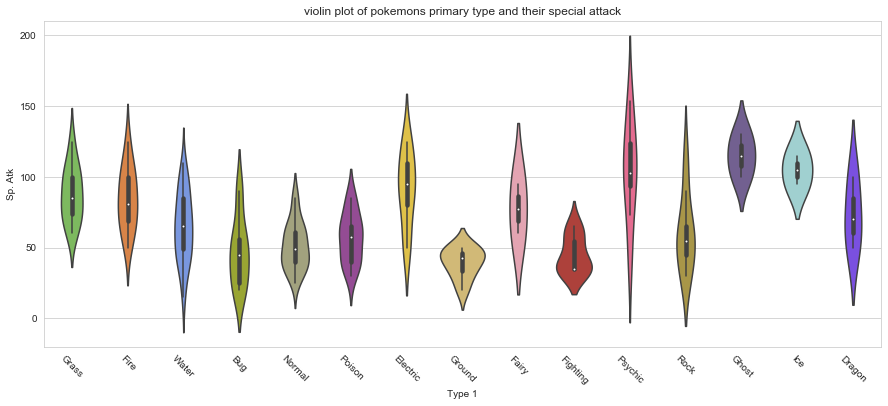

In [9]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Type 1', y='Sp. Atk', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)
plt.title("violin plot of pokemons primary type and their special attack")

Text(0.5, 1.0, 'Number of pokemon in each primary type')

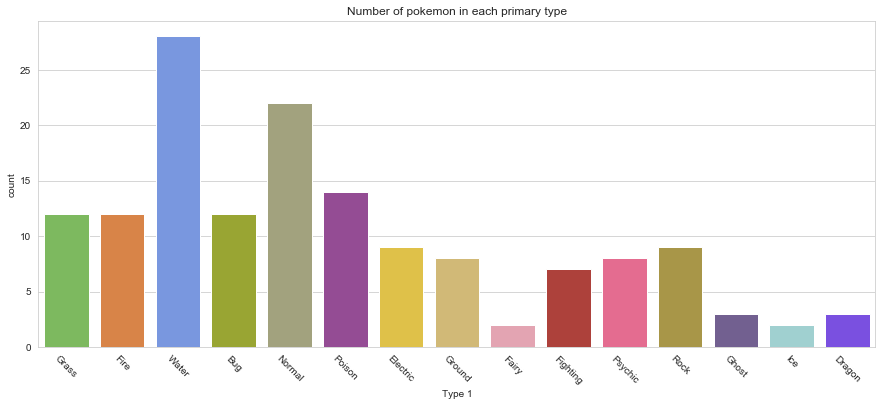

In [10]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)
plt.title("Number of pokemon in each primary type")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

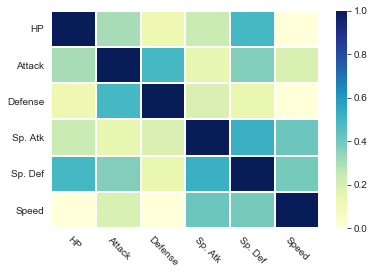

In [20]:
corr = stats_df.corr()
sns.heatmap(corr, vmin = 0, vmax = 1, linewidths = 1, cmap="YlGnBu")
plt.xticks(rotation=-45)